**TASK 1- IRIS FLOWER CLASSIFICATION BY Sooraj Ali Panhwar**

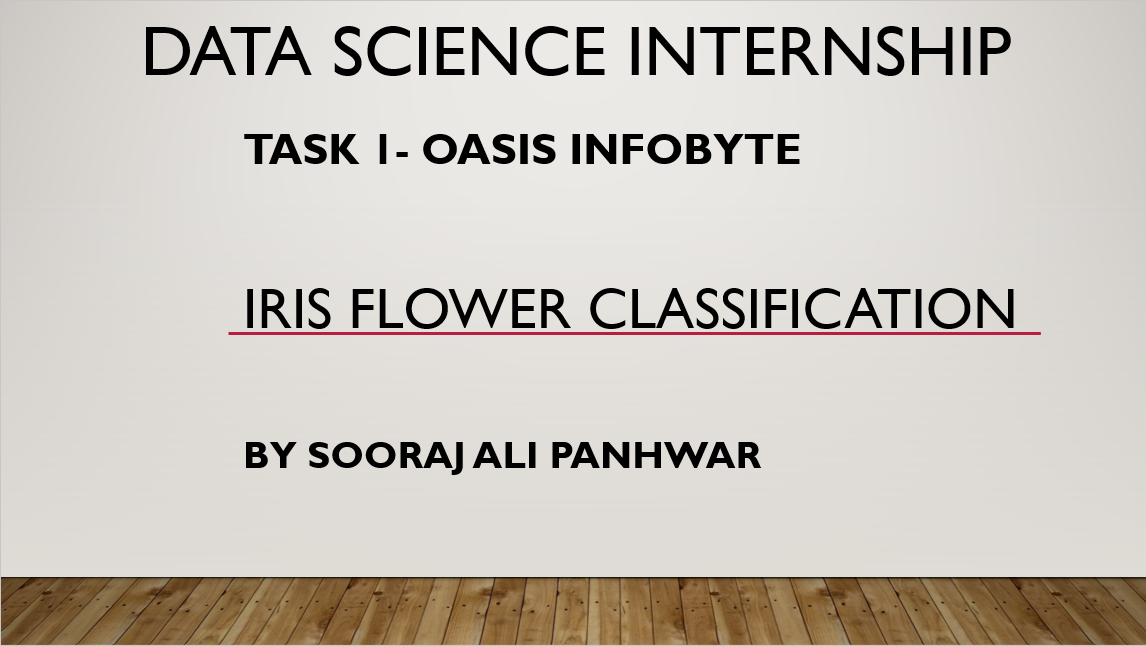

In [59]:
from IPython import display
display.Image("INTRODUCTION.png")

Step 1: Import required Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Step 2 : Loading The Dataset

In [30]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
irisdf = pd.read_csv(url, header=None, names=column_names)

**Step 3 :  Data Exploration**

In [31]:
print(irisdf.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


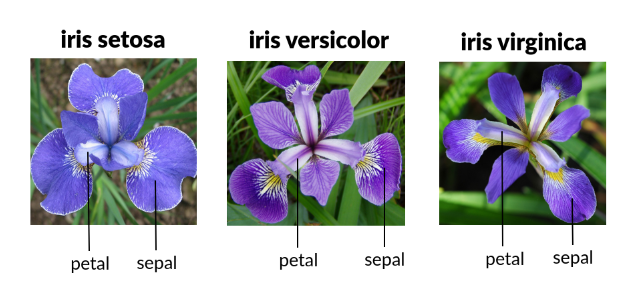

In [61]:
from IPython import display
display.Image("Iris.png")

In [32]:
print(irisdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [33]:
print(irisdf.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [34]:
print(irisdf['species'].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


**pairplot for initial exploration**

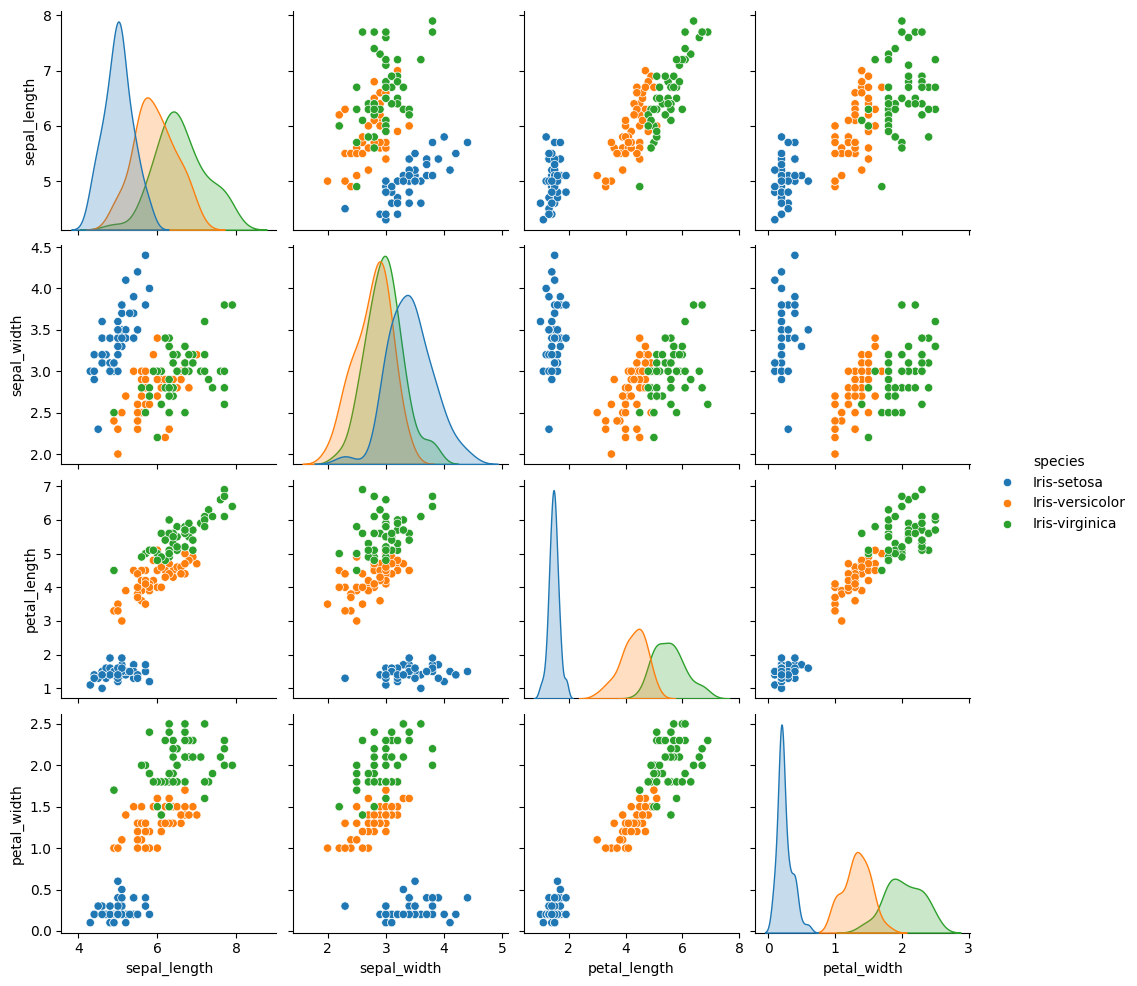

In [35]:
sns.pairplot(irisdf, hue='species')
plt.show()

**Step 4 : Data Processing**  encoding the species column

In [37]:
irisdf['species'] = irisdf['species'].astype('category').cat.codes

seperate features and targets

In [38]:
X = irisdf.drop('species', axis=1)
y = irisdf['species']

standardize the features

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

correlation matrix (after encoding species)

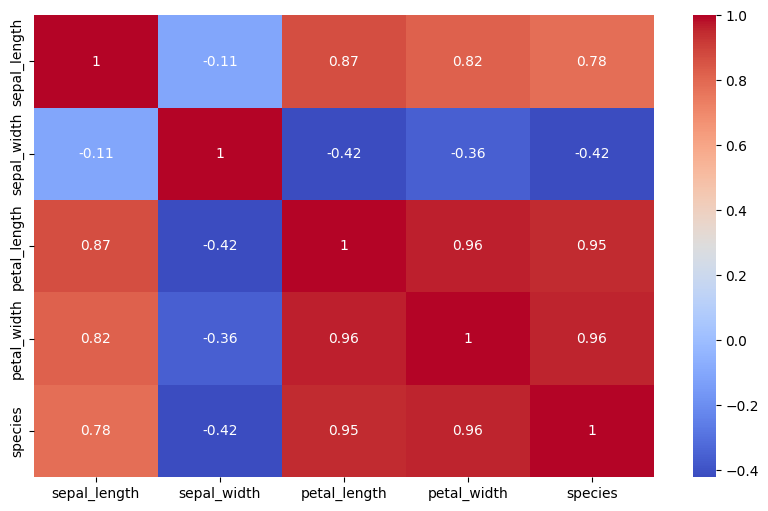

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(irisdf.corr(), annot=True, cmap='coolwarm')
plt.show()

**Step 5 : Train-Test Split**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Step 6 : Model Training**  Using different classifiers

In [43]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

Dictionary to store the results

In [44]:
results = {}

**Train and evaluate each model**

In [45]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 1.00
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Support Vector Machine Accuracy: 1.00


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [47]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Step 7 : Model Evaluation**

In [48]:
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.2f}")

Best Model: Logistic Regression with Accuracy: 1.00


In [56]:
log_reg = models["Logistic Regression"]
y_pred_log_reg = log_reg.predict(X_test)

print("--- Logistic Regression ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Step 8 : Make Predictions**  Predict with the best model

In [51]:
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

**Display some predictions**

In [52]:
print("Some predictions:", y_pred_best[:10])
print("Actual labels:   ", y_test.values[:10])

Some predictions: [1 0 2 1 1 0 1 2 1 1]
Actual labels:    [1 0 2 1 1 0 1 2 1 1]
